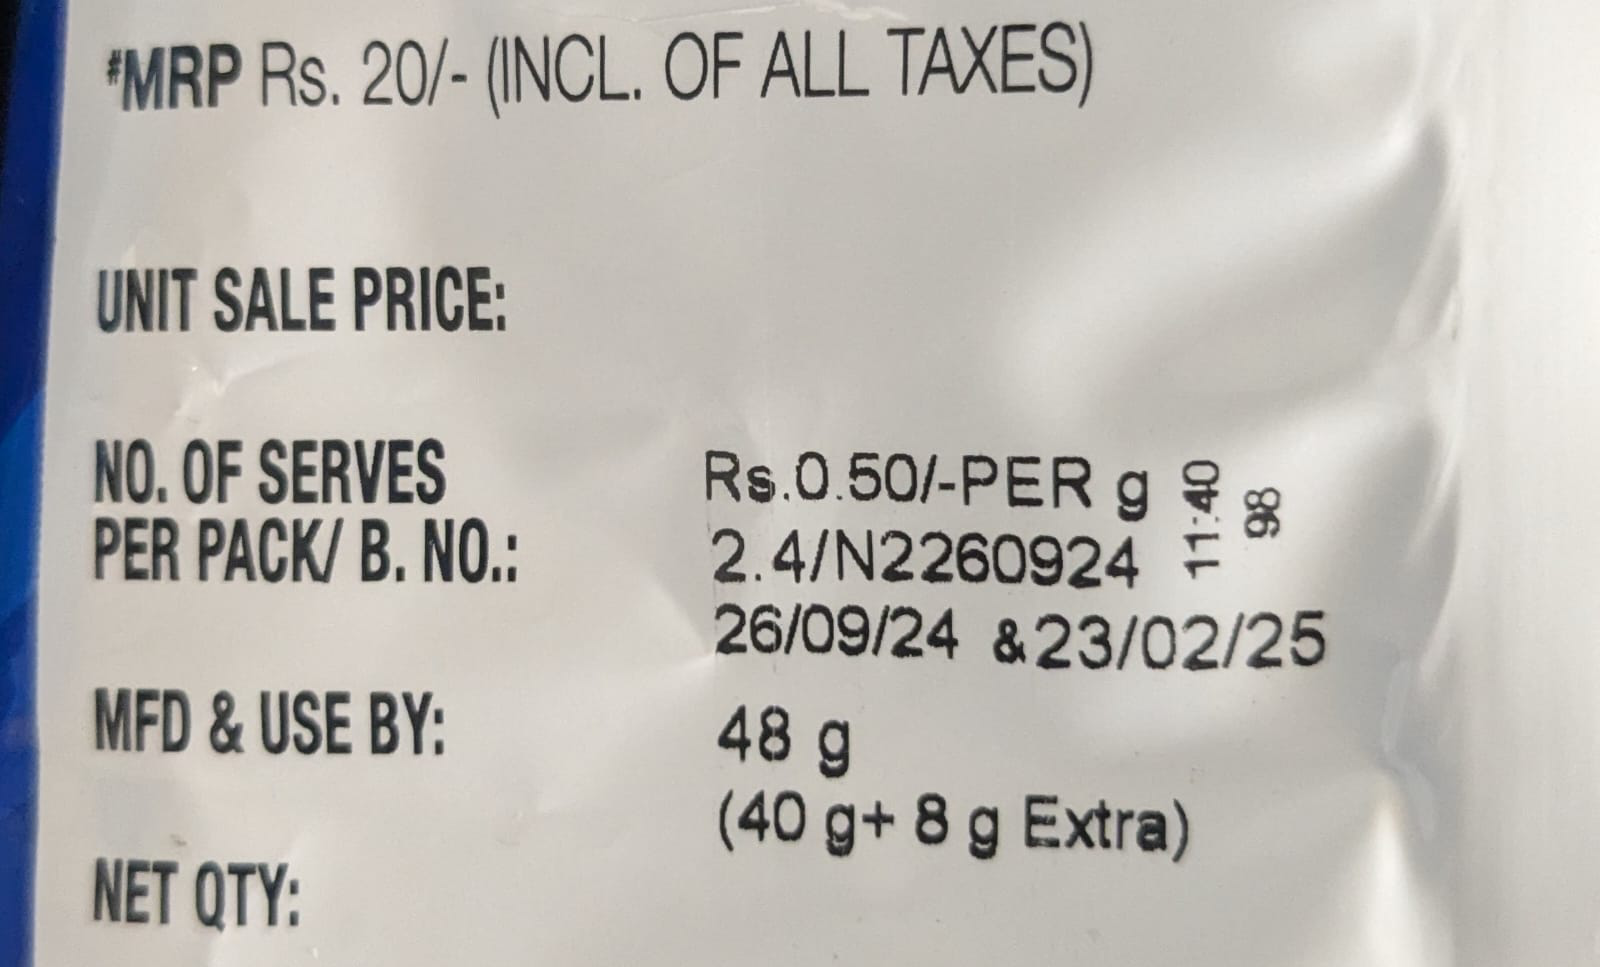

Extracted Text:
 ‘MRP Rs. 20/- (INCL. OF ALL TAXES)

UNIT SALE PRICE:

NO. OF SERVES Rs.0.50/-PER
PERPACK/B.NO: 2-4/No@eogog ©

26/09/24 &23/02/25
MFD & USE BY: 48 g

(409+ 8g E
NET OTY: oo


MRP: Rs. 20/-
Manufactured Date: 26/09/24
Expiry Date: 23/02/25
The product is not expired.


In [8]:
import pytesseract
from PIL import Image
import re
from datetime import datetime

# Load the image from file
image_path = 'OCR_mrp_expiry.jpg'  # Update this with the actual image path
img = Image.open(image_path)
display(img)

# Perform OCR on the image
text = pytesseract.image_to_string(img)

# Print the extracted text (for debugging purposes)
print("Extracted Text:\n", text)

# Extracting the MRP using a flexible pattern to match common OCR noise
mrp_match = re.search(r'MRP.*?Rs\.\s?(\d+)', text, re.IGNORECASE)
mrp = mrp_match.group(1) if mrp_match else 'N/A'

# Extracting the manufacture and expiry dates using a more tolerant date pattern
dates_match = re.search(r'(\d{2}/\d{2}/\d{2})\s?&\s?(\d{2}/\d{2}/\d{2})', text)
manufactured_date = dates_match.group(1) if dates_match else 'N/A'
expiry_date = dates_match.group(2) if dates_match else 'N/A'

# Print the extracted values
print(f"MRP: Rs. {mrp}/-")
print(f"Manufactured Date: {manufactured_date}")
print(f"Expiry Date: {expiry_date}")

# Check if the expiry date is valid and compare with the current date
if expiry_date != 'N/A':
    try:
        # Convert the expiry date to a datetime object (assuming DD/MM/YY format)
        exp_date_obj = datetime.strptime(expiry_date, '%d/%m/%y')
        
        # Get the current date
        current_date = datetime.now()
        
        # Compare the dates
        if current_date > exp_date_obj:
            print("The product has expired.")
        else:
            print("The product is not expired.")
    except ValueError:
        print("Could not parse the expiry date format.")
else:
    print("No expiry date found.")

